# New Orleans Dataset

Mileva Van Tuyl
Funing Yang
Daphka Alius
Jane Yang

In [2]:
import csv
import json
from datetime import datetime
import datetime
from difflib import get_close_matches
import collections
import pandas as pd
import GetOldTweets3 as got
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
tweets = csv.reader(open('/Users/yyang5/Downloads/CredLab_week1/ira_tweets_csv_hashed.csv',encoding='utf-8'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yyang5/Downloads/CredLab_week1/ira_tweets_csv_hashed.csv'

In [0]:
def getFakeTweets(newsName):
    nola_clean = []
    for tweet in tweets:
        if tweet[3] == newsName: 
            nola_clean.append(tweet)
        #print(tweet[12])
    with open(newsName+'.txt', 'w') as outfile:
        json.dump(nola_clean,outfile)


In [0]:
fake_news_accounts = [
    'NewOrleansON',
'ElPasoTopNews',
'DailySanJose',
'ChicagoDailyNew',
'DailySanFran',
'DetroitDailyNew',
'TodayCincinnati',
'MinneapolisON',
'KansasDailyNews',
'TodayBostonMA',
'TodayPittsburgh',
'Seattle_Post',
'PhiladelphiaON',
'DailyLosAngeles',
'HoustonTopNews',
'DailySanDiego',
'DallasTopNews',
'WashingtOnline',
'TodayNYCity',
'OnlineCleveland',
'SanAntoTopNews',
'PhoenixDailyNew',
'TodayMiami',
'Atlanta_Online',
'Baltimore0nline',
'OaklandOnline',
'StLouisOnline']

In [0]:
for account in fake_news_accounts:
    try:
        getFakeTweets(account)
    except IndexError:
        print(account)

KeyboardInterrupt: 

In [0]:
import urllib
import requests


In [0]:
news_obj = []
f_start_date =[]
f_end_date =[]
#urls = []
fakeAccountDict={}
for account in fake_news_accounts:
    fakeAccountDict[account]=[]


def getUrls(newsName):
    with open(newsName+'.txt','r') as json_file:
        news_obj.append(json.load(json_file))
        news_obj[-1].sort(key = lambda aList: aList[13])
        fakeAccountDict[newsName].append(news_obj[-1][0][13])
        fakeAccountDict[newsName].append(news_obj[-1][-1][13])
        f_start_date.append(news_obj[-1][0][13])
        f_end_date.append(news_obj[-1][-1][13])
        urls = []
        for i in range(len(news_obj[-1])):
            url = news_obj[-1][i][28]
            if "//" in url: 
                try:
                    url_clean = url[1:-1]
                    nl = requests.get(url_clean,timeout=0.05)
                    urls.append(urllib.parse.urlparse(nl.url).netloc)
                    #print(collections.Counter(urls))
                except requests.exceptions.Timeout: 
                    pass
                except requests.ConnectionError:
                    pass
                except requests.exceptions.HTTPError:
                    pass

        fakeAccountDict[newsName].append(set(urls))
    with open(newsName+"_urls.txt", 'w') as outfile:
        json.dump(fakeAccountDict[newsName], outfile)

In [0]:
for news in fake_news_accounts:
    getUrls(news)

In [0]:
print(fakeAccountDict['SanAntoTopNews'])

KeyError: 'TodayPittsburgh'

In [0]:
realTweetsList=[]
#'2014-09-15', '2014-09-30', '2014-10-15', '2014-10-31','2014-11-15', '2014-11-30', '2014-12-15', '2014-12-31','2015-01-15', '2015-01-31', '2015-02-15', '2015-02-28','2015-03-15', '2015-03-31', '2015-04-15', '2015-04-30','2015-05-15', '2015-05-31', '2015-06-15',
#dates= [ '2015-06-30',
          #     '2015-07-15', '2015-07-31', '2015-08-15', '2015-08-31',
          #     '2015-09-15', '2015-09-30', '2015-10-15', '2015-10-31',
          #     '2015-11-15', '2015-11-30', '2015-12-15', '2015-12-31',
          #    '2016-01-15']


for i in range(len(dates)-1):
    realTweets=got.manager.TweetCriteria().setUsername('NOLAnews').setSince(dates[i]).setUntil(dates[i+1])
    tweet = got.manager.TweetManager.getTweets(realTweets)[::]
    #for item in tweet:
        #realTweetsList.append(item.text)
    realTweetsList=[(str(item.date),item.id,item.username,item.text,item.hashtags) for item in tweet]
    with open(str(dates[i])+'.txt','w') as outfile:
        json.dump(realTweetsList,outfile)
    realTweetsList =[]




#print(len(realTweetsList))

In [0]:
# Collect the tweets for the fake NOLA

#tweets = csv.reader(open('/Users/yyang5/Downloads/CredLab_week1/ira_tweets_csv_hashed.csv',encoding='utf-8'))
#fakeTweetsList=[]
#for tweet in tweets:
#    fakeTweetsList.append(tweet[12])
#print(fakeTweetsList[0])
with open('real_tweets.txt','r') as json_file:
    real_tweets_obj = json.load(json_file)
    

FileNotFoundError: [Errno 2] No such file or directory: 'real_tweets.txt'

In [0]:
# How many tweets per day for each (old and fake)

# Use the two lists of tweets both sorted by dates: one of fake tweets, one of real tweets
# Use len to get how many elements of the list (total tweets)
# Get the first and the last element of the dates of both lists
# Subtract the latest date and the newest date to get how many days in total
# Divide the total dates by the total tweets

# suppose we have the two lists: fakeTweetsList, realTweetsList
numFakeTweet=len(nola_clean)
numRealTweet=len(realTweetsList)

# newest/oldest date for fakeTweetsList


fakeStart = datetime.datetime(2014,12,27)
fakeEnd = datetime.datetime(2017,8,8)
fake_diff = abs((fakeEnd-fakeStart).days)

realStart= datetime.datetime(2014,9,1)
realEnd = datetime.datetime(2017,8,8) 
real_diff = abs((realEnd-realStart).days)
print("fake:" + str(fake_diff)+" days")
print("real:" +str(real_diff)+" days")#datetime delta


avg_ftw_per_day = numFakeTweet/fake_diff
avg_rtw_per_day = numRealTweet/real_diff

print("average fake tweets per day: "+ str(avg_ftw_per_day))
print("average real tweets per day: "+ str(avg_rtw_per_day))

NameError: name 'nola_clean' is not defined

In [0]:
type(realEnd)

In [0]:
type(pd.datetime.date)

method_descriptor

In [68]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [70]:
init_notebook_mode(connected=True)

In [71]:
def URLRatio (fakeNewsList):
    counterFURLs=[]
    numFakeTweets = []
    pd_fakeStart = pd.to_datetime('2014-12-27', yearfirst = True)
    pd_fakeEnd = pd.to_datetime('2017-8-8', yearfirst = True)
    
    datelist = pd.date_range(pd_fakeStart,pd_fakeEnd, freq='M').tolist()
    #print(datelist)
   
    #print(type(datelist[0]))
    #print(type(datelist[0]))
    monthly_fakeTweets = []
    
    for i in range(len(datelist)-1):
        curr_month = []
        for ftweet in fakeNewsList: 
            curr = pd.to_datetime(ftweet[13])
            curr = curr.date()
            if curr>=datelist[i].date() and curr<=datelist[i+1].date():
                curr_month.append(ftweet)
                fakeNewsList.remove(ftweet)
            elif curr>datelist[i+1].date():
                #print(curr_month)
                monthly_fakeTweets.append(curr_month)
                break     
    monthly_fakeTweets.append(curr_month)  #in the case where the current month is the last
    #print(monthly_fakeTweets[3])
    
    
    numFakeTweets=[len(each_month) for each_month in monthly_fakeTweets]
    for current_month in monthly_fakeTweets:
        curr_counter = 0
        for ftweet in current_month:
            if '://' in ftweet[28]:
                #print(ftweet[28])
                curr_counter+=1                
        counterFURLs.append(curr_counter)
   #     print(counterFURLs)
   #    print(ftweet[28])
    counterNoFURLs = []
    print(numFakeTweets)
    counterNoFURLs= [i - j for i, j in zip(numFakeTweets, counterFURLs)] 
    ratioWithURLs = [i / j for i, j in zip(counterFURLs, numFakeTweets) if j is not 0 ] 
    ratioNoURLs = [i / j for i, j in zip(counterNoFURLs, numFakeTweets) if j is not 0] 


 #   ratioWithURLs=(counterFURLs/numFakeTweets)
#  ratioNoURLs=(counterNoFURLs/numFakeTweets)
    
    
    
    print("This fake news account has a total number of "+ str(numFakeTweets)+" tweets.")
    print("This is the ratio of tweets with URLs: "+str(ratioWithURLs))
    print("This is the ratio of tweets with No URLs: "+str(ratioNoURLs))
    labels = 'WithURLs','WithoutURLs'
    trace1 = go.Bar(
        x=datelist,
        y=counterFURLs,
        name='with URLs'
    )
    trace2 = go.Bar(
        x=datelist,
        y=counterNoFURLs,
        name='without URLs'
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='stack'
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='stacked-bar')
  #  for i in range(len(ratioWithURLs)):       
  #      sizes = [ratioWithURLs[i],ratioNoURLs[i]]
  #      colors=['yellowgreen', 'lightcoral']
  #      explode = (0.1, 0)  # only "explode" the 1st slice
#
  #      fig1, ax1 = plt.subplots()
  #      ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
  #      ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  #      plt.show()
  #      #return (ratioWithURLs,ratioNoURLs)

In [72]:
news_obj = []
for news in fakeNewsList:
    with open(news+'.txt','r') as inputFile:
        newOrleansON = json.load(inputFile)
        newOrleansON.sort(key = lambda aList: aList[13])


In [73]:
URLRatio(newOrleansON)

[1756, 1410, 1552, 1523, 1672, 1694, 1445, 1142, 1752, 1685, 1410, 1437, 1468, 928, 0, 1, 0, 0, 0, 0, 422, 445, 128, 186, 197, 175, 202, 214, 222, 196, 167, 167]
This fake news account has a total number of [1756, 1410, 1552, 1523, 1672, 1694, 1445, 1142, 1752, 1685, 1410, 1437, 1468, 928, 0, 1, 0, 0, 0, 0, 422, 445, 128, 186, 197, 175, 202, 214, 222, 196, 167, 167] tweets.
This is the ratio of tweets with URLs: [0.06150341685649203, 0.014184397163120567, 0.01095360824742268, 0.005909389363099146, 0.005980861244019139, 0.007674144037780401, 0.007612456747404845, 0.008756567425569177, 0.00684931506849315, 0.005341246290801187, 0.00851063829787234, 0.022268615170494086, 0.03746594005449591, 0.09159482758620689, 0.0, 0.9976303317535545, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9948979591836735, 0.9940119760479041, 0.9940119760479041]
This is the ratio of tweets with No URLs: [0.9384965831435079, 0.9858156028368794, 0.9890463917525774, 0.9940906106369009, 0.9940191387559809, 0.99232585596

In [0]:
def makeRatioChart(ratioURLs,ratioNoURLs):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'WithURLs','WithoutURLs'
    sizes = [ratioURLs,ratioNoURLs]
    colors=['yellowgreen', 'lightcoral']
    explode = (0.1, 0)  # only "explode" the 1st slice

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    
#sizes = [215, 130, 245, 210]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#autopct='%1.1f%%', shadow=True, startangle=140)


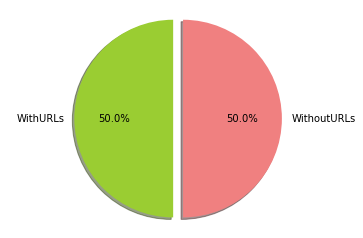

In [0]:
makeRatioChart(0.5,0.5)

In [0]:
# Identify close matches of strings

import difflib
from difflib import get_close_matches

#help(get_close_matches)

for ritem in realTweetsList:
    get_close_matches(ritem,nola_clean,cutoff=0.6)

    
